# WORKSHOP - 5: License Plate Detection using OpenCV and Haar Cascade Classifier #

# NAME : Rhudhra phriyamvadha K S #

# REG NO : 212224040275 #

In [18]:
import cv2
import matplotlib.pyplot as plt
import os
import urllib.request

In [19]:
image_path = 'my image.jpg'  # <-- Change this to your image filename
image = cv2.imread(image_path)

In [20]:
if image is None:
    raise FileNotFoundError("Image not found. Please check the 'image_path' variable.")

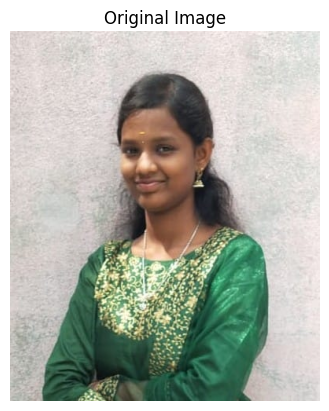

In [21]:
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title("Original Image")
plt.axis('off')
plt.show()

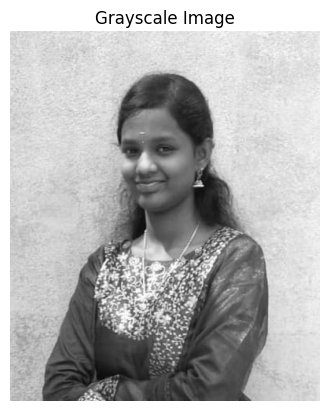

In [22]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(gray, cmap='gray')
plt.title("Grayscale Image")
plt.axis('off')
plt.show()

In [23]:
blurred = cv2.GaussianBlur(gray, (5, 5), 0)
# Histogram Equalization for better contrast
equalized = cv2.equalizeHist(blurred)

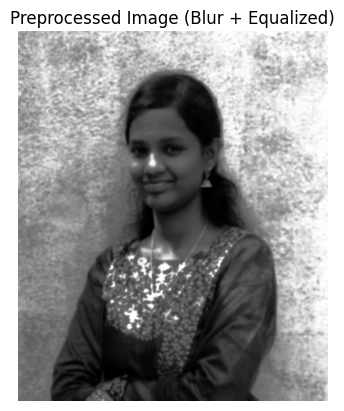

In [24]:
plt.imshow(equalized, cmap='gray')
plt.title("Preprocessed Image (Blur + Equalized)")
plt.axis('off')
plt.show()

In [25]:
cascade_path = 'haarcascade_frontalface_default.xml'

In [26]:
if not os.path.exists(cascade_path):
    print("Cascade file not found. Downloading...")
    url = "https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_frontalface_default.xml"
    urllib.request.urlretrieve(url, cascade_path)
    print("Cascade file downloaded successfully!")

In [27]:
face_cascade = cv2.CascadeClassifier(cascade_path)

In [28]:
faces = face_cascade.detectMultiScale(
    equalized,          # Preprocessed grayscale image
    scaleFactor=1.1,    # Scaling factor between image pyramid layers
    minNeighbors=5,     # Higher value -> fewer false detections
    minSize=(30, 30)    # Minimum object size
)

In [29]:
print(f"Total Faces Detected: {len(faces)}")

Total Faces Detected: 4


In [30]:
output = image.copy()
save_dir = "Detected_Faces"
os.makedirs(save_dir, exist_ok=True)

In [31]:
for i, (x, y, w, h) in enumerate(faces):
    cv2.rectangle(output, (x, y), (x + w, y + h), (0, 255, 0), 3)
    face_crop = image[y:y+h, x:x+w]
    save_path = f"{save_dir}/face_{i+1}.jpg"
    cv2.imwrite(save_path, face_crop)

In [32]:
if len(faces) > 0:
    print(f"{len(faces)} face(s) saved in '{save_dir}' folder.")
else:
    print("⚠️ No faces detected. Try adjusting parameters or using a clearer image.")

4 face(s) saved in 'Detected_Faces' folder.


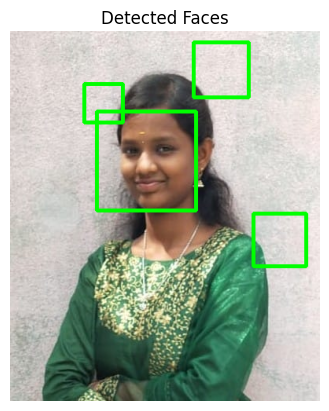

In [33]:
plt.imshow(cv2.cvtColor(output, cv2.COLOR_BGR2RGB))
plt.title("Detected Faces")
plt.axis('off')
plt.show()